In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import logging
import anndata

from matplotlib import colors
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=120)

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()

import os
import sys
sc.set_figure_params(scanpy=True, dpi_save=400,dpi=150)

-----
anndata     0.9.0.dev35+g6473f20
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.9.0.dev35+g6473f20
appnope             0.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cairo               1.19.1
cffi                1.14.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.8.2
ipykernel           5.3.3
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
leidenalg           0.8.1
llvmlite            0.37.0
louvain             0.6.1
matplotlib          3.5.0
mpl_toolkits        NA
natsort             7.0.1
nbinom_ufunc        NA
numba               0.54.1
numexpr             2.7.1
numpy               1.19.5
packaging           21.3
pandas              1.0.5
parso               0.7.0
pexpect 

In [2]:
plt.rcParams['pdf.fonttype'] = 42

In [3]:
import pandas as pd

In [4]:
basedir = '/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/hESC_2021/bulk/RNA/enrichr_results_gene_clusters_10_1/'

In [5]:
term_picks = pd.read_csv("/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/hESC_2021/bulk/RNA/downstream_figures/ENRICHR_figure_pick.csv",
            header=None)

In [6]:
term_picks

,0
0,endoderm formation (GO:0001706)
1,endodermal cell differentiation (GO:0035987)
2,negative regulation of cell cycle (GO:0045786)
3,positive regulation of cell-matrix adhesion (G...
4,glandular epithelial cell development (GO:0002...
5,hippo signaling (GO:0035329)
6,substrate adhesion-dependent cell spreading (G...
7,negative regulation of mitotic cell cycle (GO:...
8,regulation of cell-matrix adhesion (GO:0001952)
9,cell-cell adhesion via plasma-membrane adhesio...


In [7]:
databases = ["BioCarta_2016",
                "GO_Molecular_Function_2021",
                "GO_Cellular_Component_2021",
                "GO_Biological_Process_2021",
                "Panther_2016",
                "Reactome_2016",
                "KEGG_2019_Mouse",
                "KEGG_2021_Human",
                "WikiPathway_2021_Human",
                # "WikiPathway_2019_Mouse",
                "NCI-Nature_2016",
                "MSigDB_Hallmark_2020",
              "Jensen_TISSUES"]

In [8]:
basedir

'/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/hESC_2021/bulk/RNA/enrichr_results_gene_clusters_10_1/'

In [9]:
str(1)

'1'

In [10]:
len(term_picks[0])

50

In [11]:
len(set(term_picks[0]))

50

In [18]:
term_picks = pd.read_csv("/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/hESC_2021/bulk/RNA/downstream_figures/ENRICHR_figure_pick.csv",
            header=None)

term_picks = list(term_picks[0].values)

pval = pd.DataFrame(0.0,index=term_picks,columns=range(1,11))
fc = pd.DataFrame(0.0,index=term_picks,columns=range(1,11))

found = []

for clusters in range(1,11):
    for db in databases:
        clus_name = 'cluster' + str(clusters) 
        path = basedir + clus_name + '/' + clus_name + '_' + db + '_enrichr.csv'
        if os.path.exists(path):
            #print(path)
            tmp = pd.read_csv(path)
            #print(tmp)
            tmp = tmp.set_index('path_name')
            #print(tmp)
            found_one = list(tmp[tmp.index.isin(term_picks)].index)
            if len(found_one) > 0:
                pval.loc[found_one,clusters] = -np.log(tmp.loc[found_one,'adj_p_val']+0.000000001)
                fc.loc[found_one,clusters] = tmp.loc[found_one,'z_score']
                
                
            #found.extend(list(tmp[tmp.index.isin(term_picks)].index)) #- all found
            
            
        else:
            print(path + ' not found ')
            
            


<ipython-input-99-e1139cad2a39>:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=pval.T)


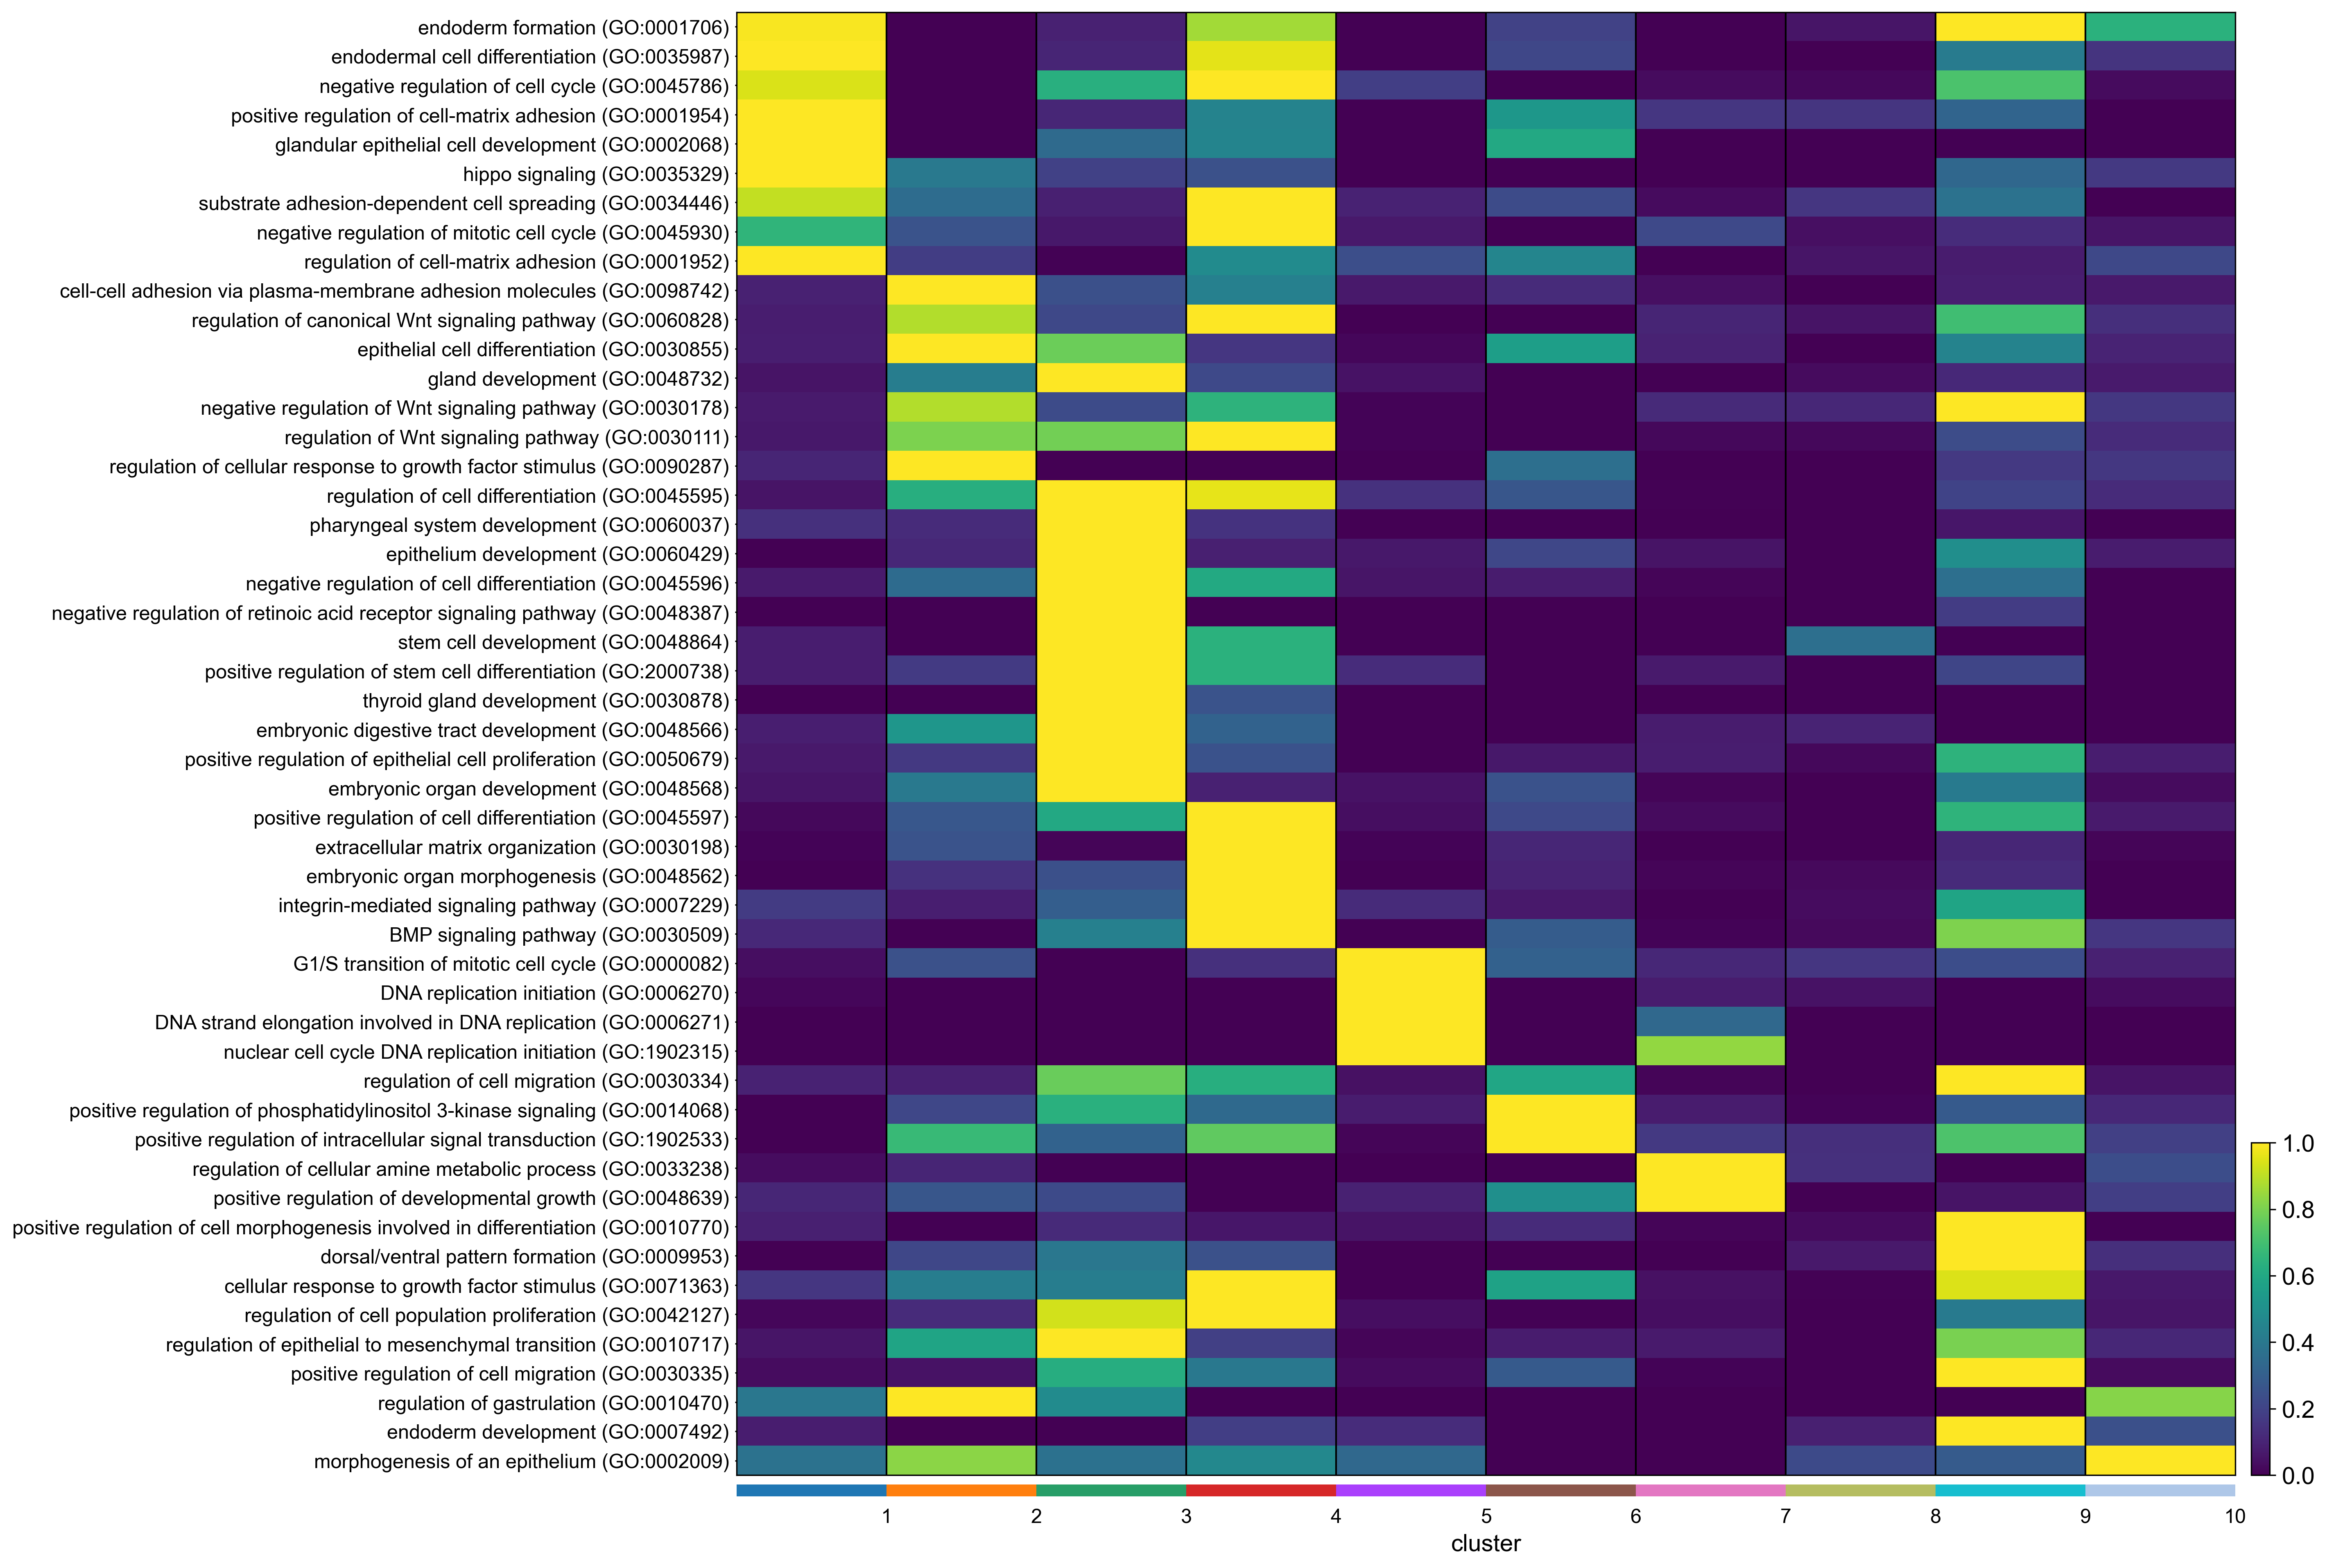

In [99]:
adata = anndata.AnnData(X=pval.T)
adata.obs['cluster'] = adata.obs.index.astype('category')
adata.obs['cluster'] = adata.obs['cluster'].cat.reorder_categories([str(entry) for entry in range(1,11)])
#adata.uns['cluster_colors'] = cluster_colors

sc.pl.heatmap(adata,figsize=(16,16),standard_scale='var',dendrogram=False,swap_axes=True,var_names=adata.var.index,groupby='cluster',
              show_gene_labels=True,save='_go_term_heatmap_pval.pdf')

<ipython-input-19-76893a3f8e11>:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=fc.T)
/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


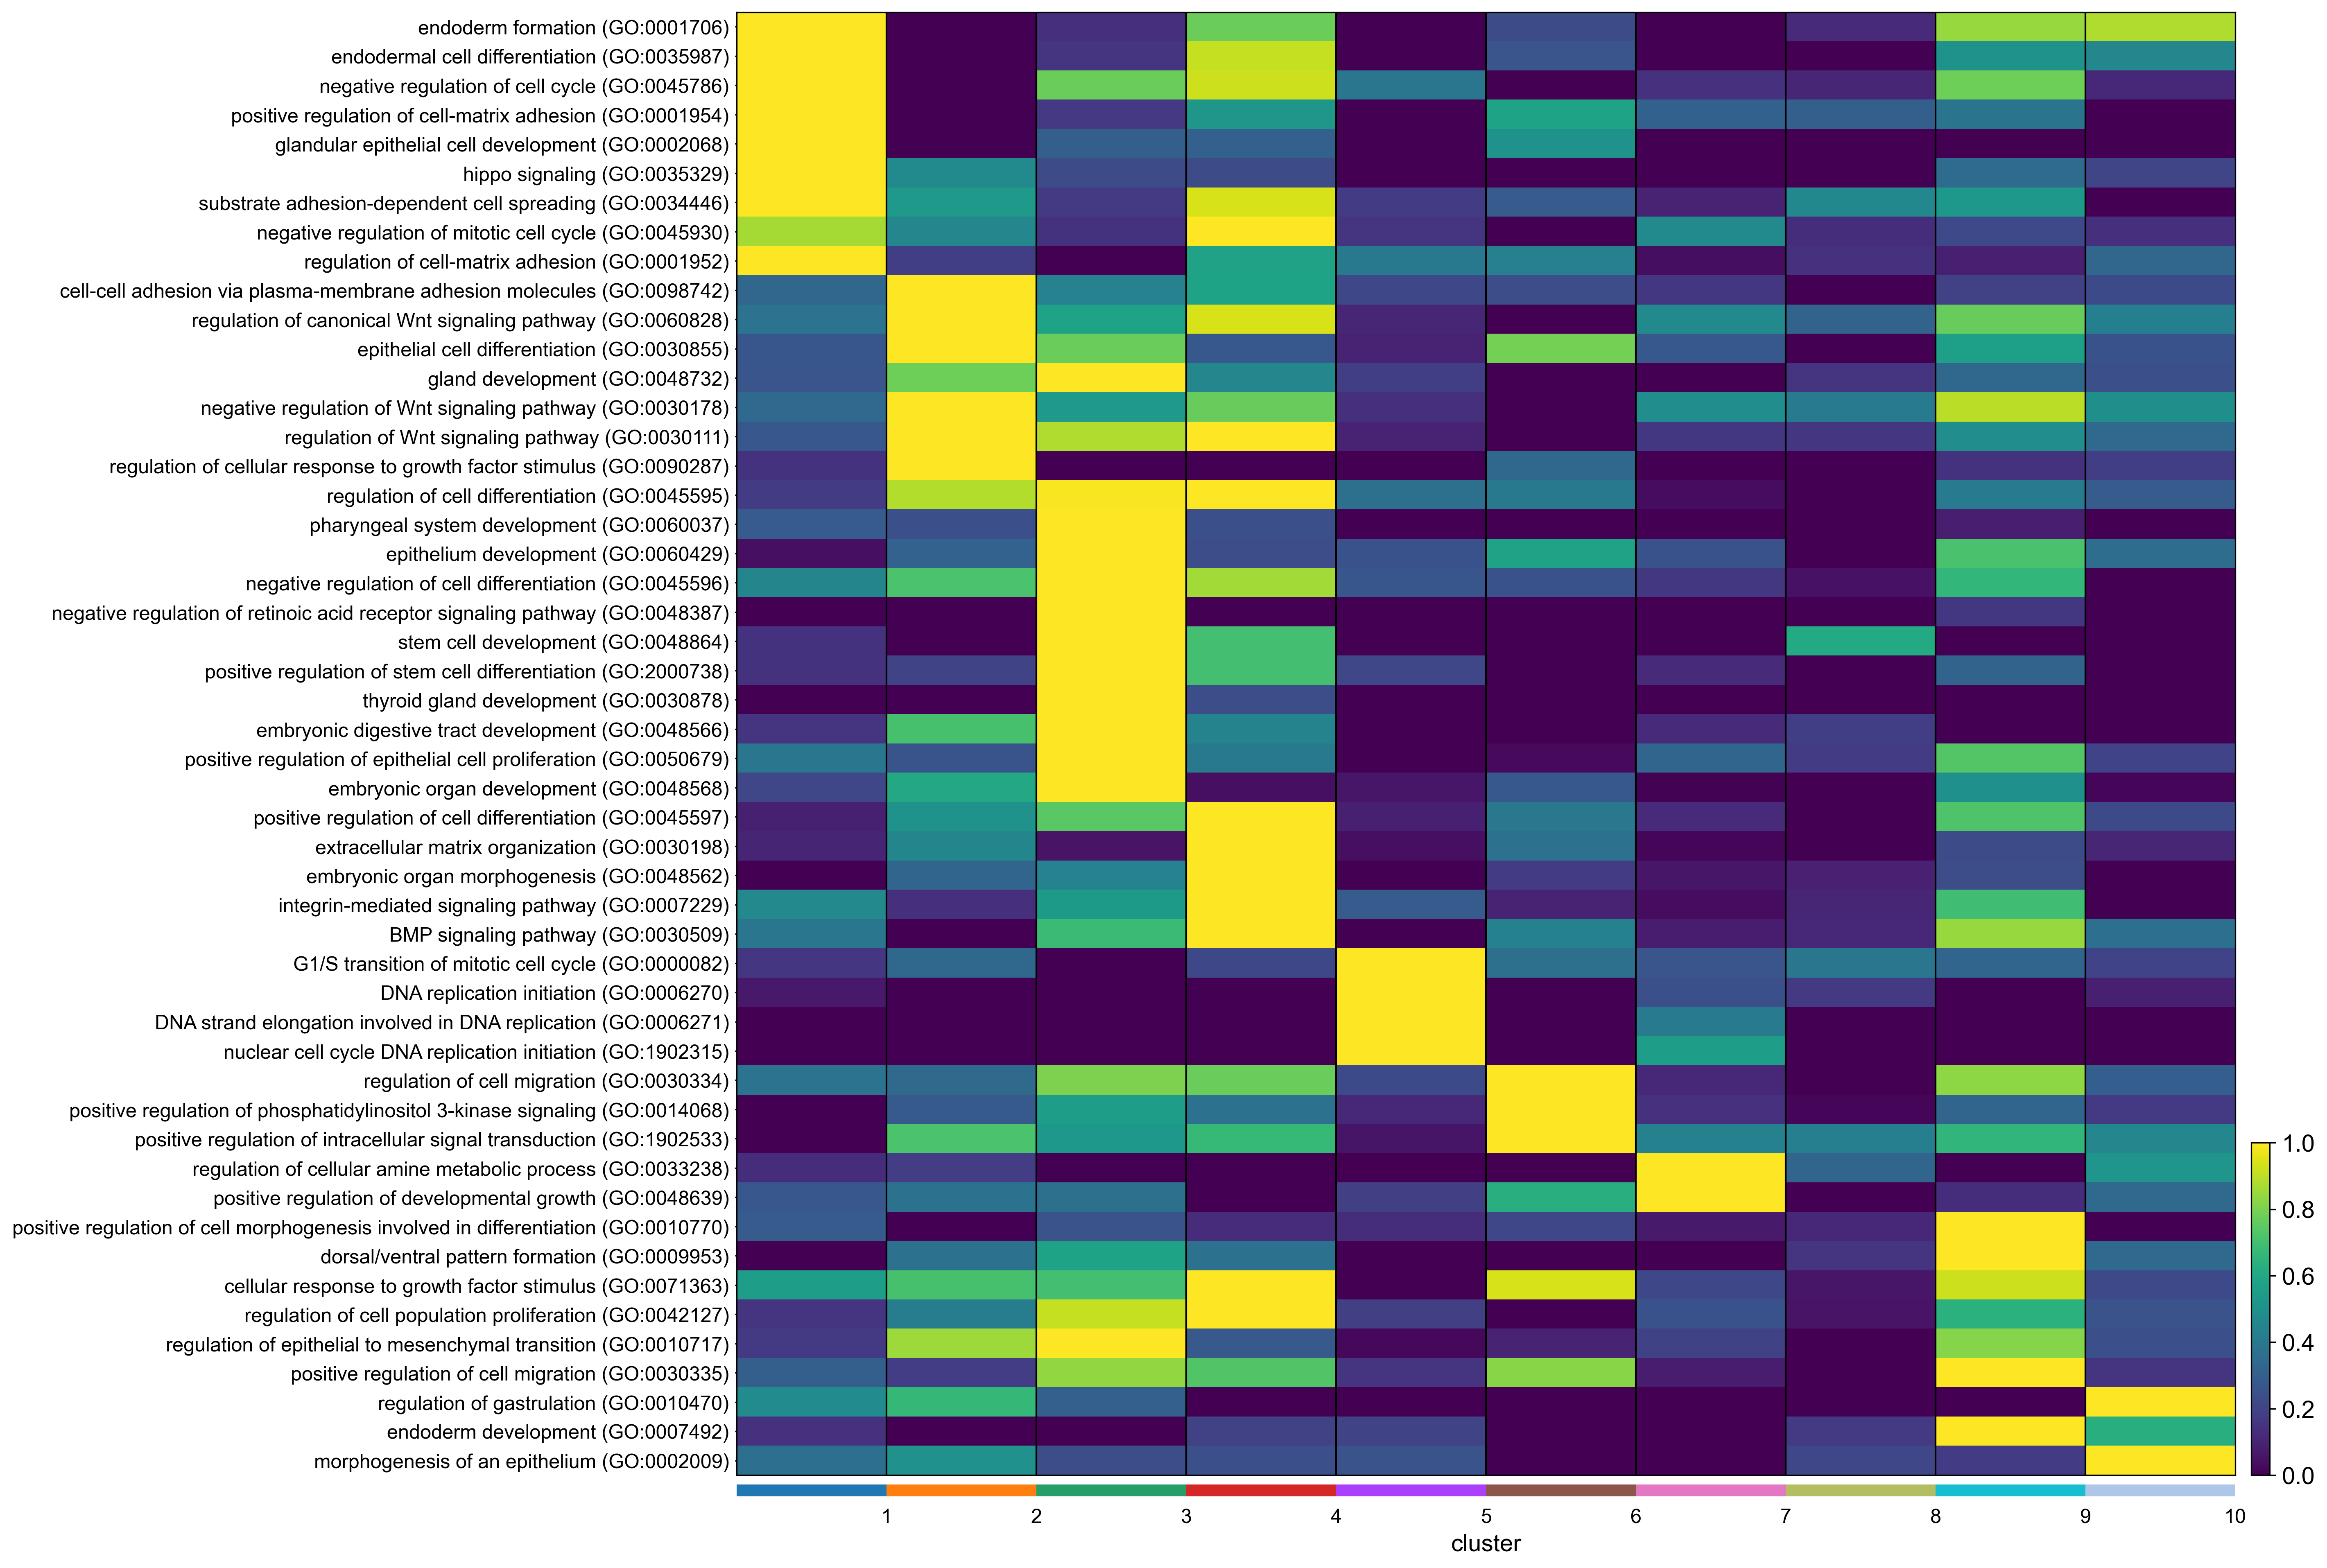

In [19]:
adata = anndata.AnnData(X=fc.T)
adata.obs['cluster'] = adata.obs.index.astype('category')
adata.obs['cluster'] = adata.obs['cluster'].cat.reorder_categories([str(entry) for entry in range(1,11)])
#adata.uns['cluster_colors'] = cluster_colors

sc.pl.heatmap(adata,figsize=(16,16),standard_scale='var',dendrogram=False,swap_axes=True,var_names=adata.var.index,groupby='cluster',
              show_gene_labels=True,save='_go_term_heatmap_fc.pdf')